# main

In [1]:
import pytesseract
from PIL import Image
import pyautogui
import cv2
import requests
import time
import numpy as np
from bs4 import BeautifulSoup
import subprocess
import webbrowser

# ===== CONFIG =====
URL = "https://aabhyasa.com/contact"
SCROLL_AMOUNT = -5     # negative = scroll down
SCROLL_DELAY = 0.8
SCROLL_LIMIT = 200      # max scroll attempts before giving up

# --- Screenshot helper ---
def take_screenshot():
    screenshot_path = "screen.png"
    subprocess.run(["gnome-screenshot", "-f", screenshot_path])
    time.sleep(1)
    return screenshot_path

# --- OCR extraction ---
def extract_text(image_path):
    img = Image.open(image_path).convert("L")  # grayscale
    img = img.point(lambda x: 0 if x < 130 else 255)  # threshold
    text = pytesseract.image_to_string(img).lower()
    return text

# --- Find coordinates of text in image ---
def find_text_coordinate_in_image(image_path, search_text):
    img = Image.open(image_path).convert("L")
    img = img.point(lambda x: 0 if x < 130 else 255)

    boxes = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)
    for i in range(len(boxes['text'])):
        if search_text.lower() in boxes['text'][i].lower():
            x, y, w, h = boxes['left'][i], boxes['top'][i], boxes['width'][i], boxes['height'][i]
            center_x = x + w // 2
            center_y = y + h // 2
            return (center_x, center_y)
    return None

# --- Fill field and press Tab ---
def fill_field(value):
    pyautogui.typewrite(value)
    pyautogui.press("tab")
    time.sleep(0.5)

# --- Main automation ---
def main():
    # 1) Open browser
    webbrowser.open(URL)
    print("[INFO] Browser opened...")
    time.sleep(3)  # wait for load

    # 2) Parse HTML for field names
    headers = {
        "User-Agent": (
            "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 "
            "(KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
        )
    }
    res = requests.get(URL, headers=headers)
    soup = BeautifulSoup(res.text, "html.parser")
    form = soup.find("form")

    fields_bs4 = form.find_all(["input", "textarea"])
    field_names = []
    for tag in fields_bs4:
        if tag.get("type") in ["submit", "hidden", "checkbox", "radio"]:
            continue
        placeholder = tag.get("placeholder") or tag.get("name") or tag.get("id")
        if placeholder:
            field_names.append(placeholder.strip())

    print("[INFO] Required fields:", field_names)

    # 3) Ask user for data
    # input_data = {}
    input_data = {
        "name": "John Doe",
        "phone": "9876543210",
        "email": "john@example.com",
        "subject": "Test Subject",
        "message": "This is a test message"
    }
    # for name in field_names:
    #     val = input(f"[INPUT] Enter value for '{name}': ")
    #     input_data[name.lower()] = val.strip()
    # time.sleep(3)

    # 4) Locate first field ("name") by OCR
    target_label = field_names[0]  # assume first field is "name"
    coord = None
    for attempt in range(SCROLL_LIMIT):
        shot = take_screenshot()
        coord = find_text_coordinate_in_image(shot, target_label)
        if coord:
            print(f"[FOUND] '{target_label}' at {coord} (attempt {attempt+1})")
            pyautogui.click(coord[0], coord[1])
            fill_field(input_data[target_label.lower()])
            input_data[target_label.lower()] = ""  # mark filled
            break
        print(f"[INFO] '{target_label}' not found, scrolling...")
        pyautogui.scroll(SCROLL_AMOUNT)
        time.sleep(SCROLL_DELAY)

    # 5) Fill remaining fields sequentially via Tab
    for fname, fvalue in input_data.items():
        if fvalue:
            fill_field(fvalue)

    # 6) Scroll to find "submit" button and click
    pyautogui.press('enter')
    # for attempt in range(SCROLL_LIMIT):
    #     shot = take_screenshot()
    #     coord = find_text_coordinate_in_image(shot, "submit")
    #     if coord:
    #         pyautogui.click(coord[0], coord[1])
    #         print("[INFO] Submit button clicked.")
    #         break
    #     print("[INFO] Scrolling to find submit...")
    #     pyautogui.scroll(SCROLL_AMOUNT)
    #     time.sleep(SCROLL_DELAY)

if __name__ == "__main__":
    main()


[INFO] Browser opened...
[INFO] Required fields: ['name', 'phone', 'email', 'subject', 'message']
[INFO] 'name' not found, scrolling...
[FOUND] 'name' at (666, 846) (attempt 2)


In [ ]:
import pytesseract
from PIL import Image, ImageDraw
import pyautogui
import cv2
import numpy as np
import time

def find_and_mark_text_on_screen(search_text, save_path="annotated_screenshot.png"):
    # Take screenshot
    time.sleep(3)
    screenshot = pyautogui.screenshot()
    screenshot_path = "screen.png"
    screenshot.save(screenshot_path)

    # Load screenshot in grayscale
    img = Image.open(screenshot_path).convert("L")
    img_bin = img.point(lambda x: 0 if x < 130 else 255)

    # Run OCR to get bounding boxes
    boxes = pytesseract.image_to_data(img_bin, output_type=pytesseract.Output.DICT)

    draw_img = screenshot.copy()  # Color version for drawing
    draw = ImageDraw.Draw(draw_img)

    for i in range(len(boxes['text'])):
        print(boxes['text'])
        if search_text.lower() in boxes['text'][i].lower():
            x, y, w, h = boxes['left'][i], boxes['top'][i], boxes['width'][i], boxes['height'][i]
            # Draw rectangle
            draw.rectangle([(x, y), (x + w, y + h)], outline="red", width=2)

            # Save annotated image
            draw_img.save(save_path)

            # Return center coordinates
            center_x = x + w // 2
            center_y = y + h // 2
            return (center_x, center_y)

    # If no match found
    draw_img.save(save_path)  # Save screenshot anyway
    return None

find_and_mark_text_on_screen('Code')

(628, 177)

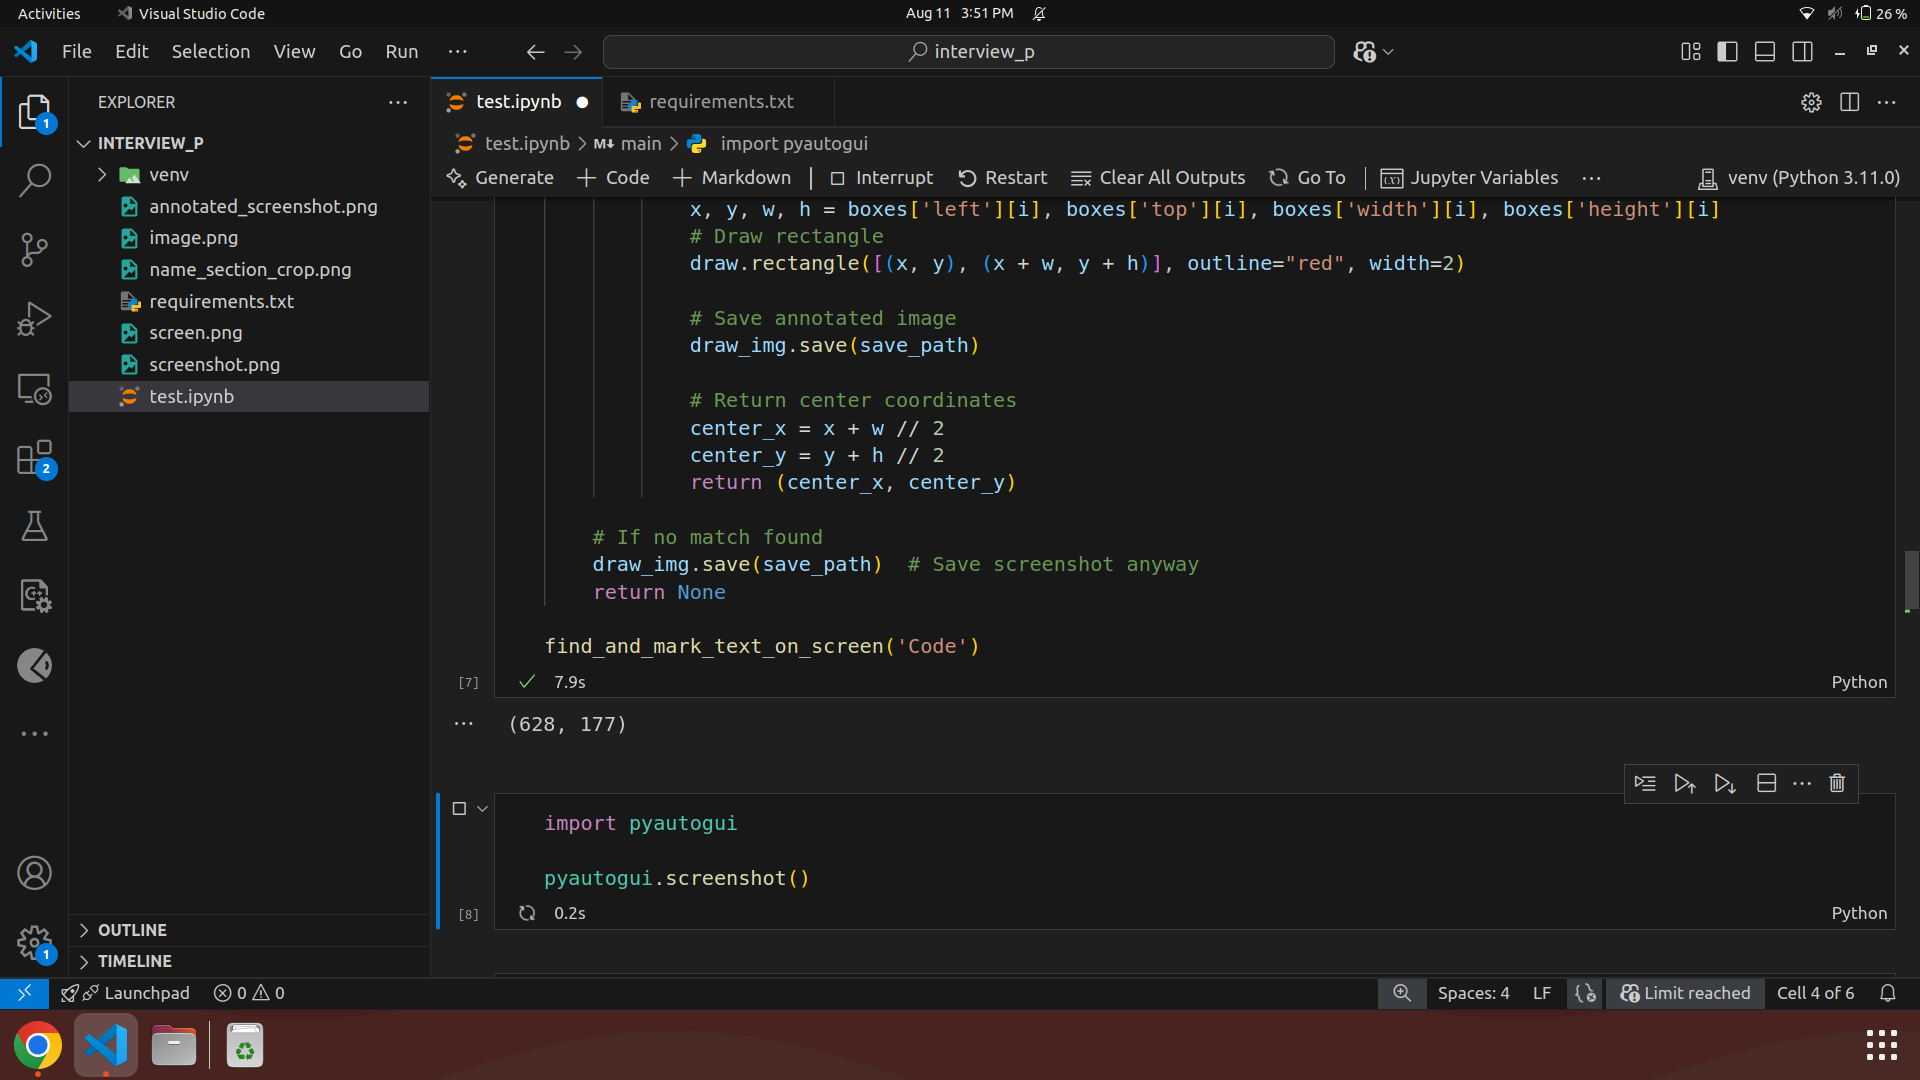

In [8]:
import pyautogui 

pyautogui.screenshot()

In [11]:
from requests_html import AsyncHTMLSession
from bs4 import BeautifulSoup
import nest_asyncio

import pytesseract
from PIL import Image
import pyautogui
import cv2
import requests
import time
import numpy as np
from bs4 import BeautifulSoup
import subprocess
import webbrowser

# ===== CONFIG =====
URL = "https://portfolio-praveen-gupta.vercel.app/"
SCROLL_AMOUNT = -50     # negative = scroll down
SCROLL_DELAY = 0.8
SCROLL_LIMIT = 200      # max scroll attempts before giving up

# --- Screenshot helper ---
def take_screenshot():
    screenshot_path = "screen.png"
    subprocess.run(["gnome-screenshot", "-f", screenshot_path])
    time.sleep(1)
    return screenshot_path

# --- OCR extraction ---
def extract_text(image_path):
    img = Image.open(image_path).convert("L")  # grayscale
    img = img.point(lambda x: 0 if x < 130 else 255)  # threshold
    text = pytesseract.image_to_string(img).lower()
    return text

# --- Find coordinates of text in image ---
def find_text_coordinate_in_image(image_path, search_text):
    img = Image.open(image_path).convert("L")
    img = img.point(lambda x: 0 if x < 130 else 255)

    boxes = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)
    for i in range(len(boxes['text'])):
        if search_text.lower() in boxes['text'][i].lower():
            x, y, w, h = boxes['left'][i], boxes['top'][i]+25, boxes['width'][i], boxes['height'][i]+25
            center_x = x + w // 2
            center_y = y + h // 2
            return (center_x, center_y)
    return None

# --- Fill field and press Tab ---
def fill_field(value):
    pyautogui.typewrite(value)
    pyautogui.press("tab")
    time.sleep(0.5)


# Allow nested event loops (needed for Jupyter/IPython)
nest_asyncio.apply()

async def fetch_form():
    session = AsyncHTMLSession()
    webbrowser.open(URL)
    # Load page
    r = await session.get(URL)
    
    # Render JavaScript (wait up to 20s for React to finish)
    await r.html.arender(timeout=20, sleep=2)
    
    # Parse final HTML with BeautifulSoup
    soup = BeautifulSoup(r.html.html, "html.parser")
    
    # Get the <form> element
    form = soup.find("form")

    fields_bs4 = form.find_all(["input", "textarea"])
    field_names = []
    for tag in fields_bs4:
        if tag.get("type") in ["submit", "hidden", "checkbox", "radio"]:
            continue
        placeholder = tag.text or tag.get("name") or tag.get("id")
        if placeholder:
            field_names.append(placeholder.strip())

    print("[INFO] Required fields:", field_names)
    return field_names

# In Jupyter, just "await" the function
field_names = await fetch_form()
input_data = {}
input_data = {
    f"{field_names[0]}": "John Doe",
    f"{field_names[1]}": "john@example.com",
    f"{field_names[2]}": "This is a test message"
}

# for name in field_names:
#     val = input(f"[INPUT] Enter value for '{name}': ")
#     input_data[name.lower()] = val.strip()
# time.sleep(3)

# 4) Locate first field ("name") by OCR
target_label = field_names[0]
coord = None
for attempt in range(SCROLL_LIMIT):
    shot = take_screenshot()
    coord = find_text_coordinate_in_image(shot, target_label)
    if coord:
        print(f"[FOUND] '{target_label}' at {coord} (attempt {attempt+1})")
        pyautogui.click(coord[0], coord[1])
        fill_field(input_data[target_label.lower()])
        input_data[target_label.lower()] = ""  # mark filled
        break
    print(f"[INFO] '{target_label}' not found, scrolling...")
    pyautogui.scroll(SCROLL_AMOUNT)
    time.sleep(SCROLL_DELAY)

# 5) Fill remaining fields sequentially via Tab
for fname, fvalue in input_data.items():
    print(f"{fname}: {fvalue}")
    if fvalue:
        fill_field(fvalue)

print(input_data)

# 6) Scroll to find "submit" button and click
pyautogui.press('enter')
# for attempt in range(SCROLL_LIMIT):
#     shot = take_screenshot()
#     coord = find_text_coordinate_in_image(shot, "submit")
#     if coord:
#         pyautogui.click(coord[0], coord[1])
#         print("[INFO] Submit button clicked.")
#         break
#     print("[INFO] Scrolling to find submit...")
#     pyautogui.scroll(SCROLL_AMOUNT)
#     time.sleep(SCROLL_DELAY)


[INFO] Required fields: ['name', 'email', 'message']
[INFO] 'name' not found, scrolling...
[FOUND] 'name' at (1012, 513) (attempt 2)
name: 
email: john@example.com
message: This is a test message
{'name': '', 'email': 'john@example.com', 'message': 'This is a test message'}
